In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import numpy as np
import mpl_toolkits.mplot3d

In [41]:
titanic = pd.read_csv('../SYD_DAT_5/data/titanic.csv', index_col='PassengerId')

In [42]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [43]:
pasAge = titanic[titanic.Age.notnull()]
age = pasAge[['Age']]

In [44]:
model = sklearn.linear_model.LogisticRegression()

In [45]:
model.fit(age, pasAge.Survived);

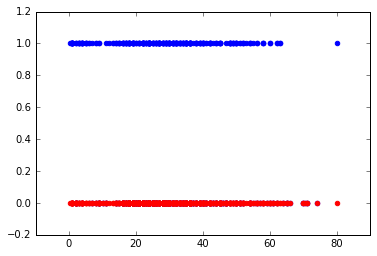

In [46]:
plt.scatter(pasAge.Age, pasAge.Survived, color="blue")
plt.scatter(pasAge.Age, model.predict(age), color="red")

In [47]:
# not much good
model.coef_

array([[-0.0110084]])

In [48]:
titanic.Sex.map(lambda x: int(x=="female"));
# or this
titanic['gender'] = np.where(titanic.Sex == "male", 0,1)

In [49]:
X = titanic[['gender', 'Pclass']]

In [50]:
model.fit(X, titanic.Survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
pred = model.predict(X)

In [53]:
print("first class, woman: ", model.predict_proba([[1,1]]))
print("third class man: ", model.predict_proba([[0,3]]))

('first class, woman: ', array([[ 0.09683983,  0.90316017]]))
('third class man: ', array([[ 0.89748952,  0.10251048]]))


In [65]:
fig = plt.figure()

In [66]:
ax = fig.add_subplot(111, projection='3d')

In [69]:
ax.scatter(titanic.Pclass, titanic.gender, pred, color='red')

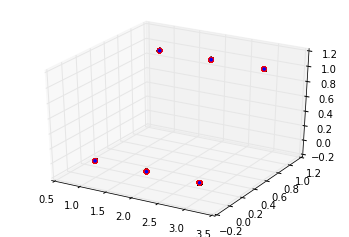

In [70]:
fig

In [71]:
model.coef_

array([[ 2.55510562, -0.92368611]])